### Cybenko's theorem extension
Neural networks are universal function approximators. They can be used to approximate ANY continuous function!

In [1]:
import dl2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image

From Wikipedia - The classical form of the universal approximation theorem for arbitrary width is as follows: The following formulation, due to Allan Pinkus, extends the classical results of George Cybenko and Kurt Hornik.

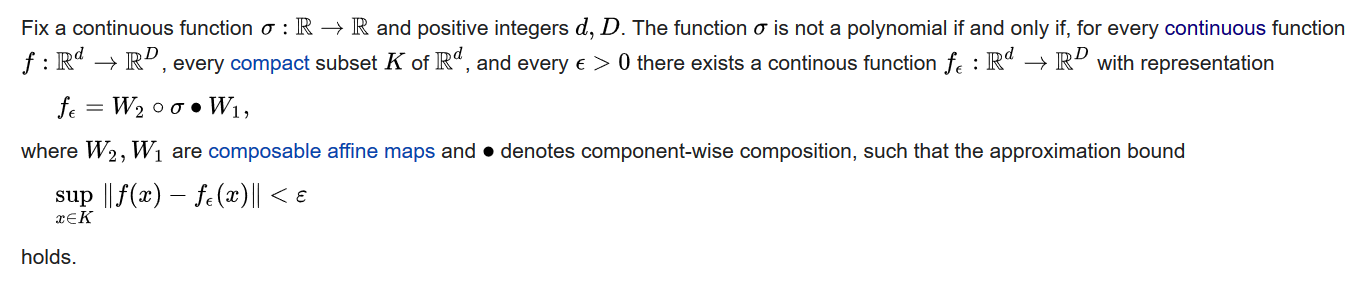

In [2]:
Image(filename='uat.png')

This theorem extends straightforwardly to networks with any fixed number of hidden layers: the theorem implies that the first layer can approximate any desired function and that later layers can approximate the identity function. Thus any fixed-depth network may approximate any continuous function, and this version of the theorem applies to networks with bounded depth and arbitrary width.

In [3]:
f = dl2.NN()
f.add(dl2.dense(5, input_dim=(1), activation='relu'))
f.add(dl2.dense(5, activation='sigmoid'))
f.add(dl2.dense(1))
f.init()
f.info()

{'input_dim': 1, 'output_dim': 5, 'layer': 'dense', 'activation': 'relu', 'requires_wgrad': True}
{'input_dim': 5, 'output_dim': 5, 'layer': 'dense', 'activation': 'sigmoid', 'requires_wgrad': True}
{'input_dim': 5, 'output_dim': 1, 'layer': 'dense', 'activation': 'none', 'requires_wgrad': True}
trainable parameters: 46


In [4]:
x = np.reshape(np.arange(0, 2, 0.01), (-1, 1))
y = x ** 2

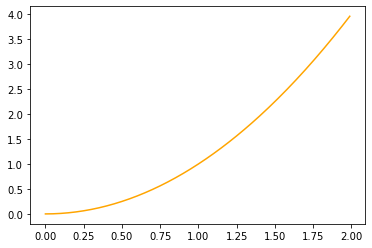

In [5]:
# function to approximate
plt.plot(x, y, c='orange')
plt.show()

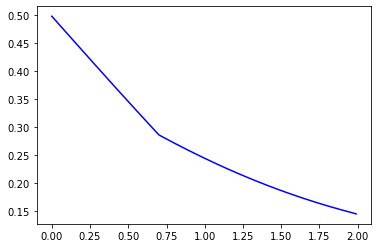

In [6]:
# network prediction before training
plt.plot(x, [f.forward(xi) for xi in x], c='blue')
plt.show()

In [13]:
f.opt, f.loss_fn = dl2.RMSprop(f.params(), 5e-3), 'mse'
f.tqdm_disable = True
history = f.fit(x, y, epochs=1000, batch_size=200)

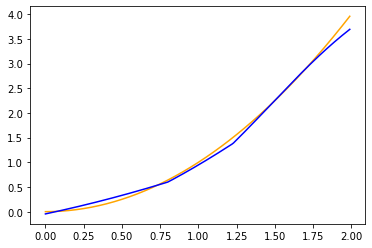

In [14]:
# network approximation after training
plt.plot(x, y, c='orange')
plt.plot(x, [f.forward(xi) for xi in x], c='blue')
plt.show()